# Mentoring 2 - Introduction to Machine Learning
---

Mentoring Session - Job Preparation Program - Pacmann AI

## Instructions
---

1. Please fill all the given tasks in here
2. You can use any library
3. For modeling, please use `sklearn` library
4. You are taksed to create a function based machine learning model. (If you cannot create the functions from the start, you can create without a function first, then put it all into a function)
5. Make sure you are following all the function descriptions
6. Submit your result to the submission form

## Dataset Description
---

**Description**
- We're looking to predict the rent price of a house
- The dataset contains of the following fields

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`name`|`str`|The name (title) of a house|
|`url`|`str`|The house url|
|`bedrooms`|`int`|The number of bedrooms|
|`bathrooms`|`int`|The number of bathrooms|
|`floors`|`int`|The number of floors|
|`land_area`|`float`|The area of land in m2|
|`building_area`|`float`|The building area in m2|
|`longitude`|`float`|The house longitude coordinate in degree|
|`latitude`|`float`|The house latitude coordinate in degree|
| `price` | `int` | The yearly rent price (IDR) , (**our target**)|

## Modeling Workflow
---

```
1. Import data to Python
2. Data Preprocessing
3. Training a Machine Learning Models
4. Test Prediction
5. Lets Explore
```

### 1. Import data to Python (5 pts)
---

In [ ]:
####################################################
# Import Numpy and Pandas library
# Write your code here
# 1 pts
####################################################
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ubah direktori kerja ke folder di Google Drive
os.chdir('/content/drive/My Drive')

In [ ]:
####################################################
# Create a function named read_data
# - Has an input of filename, i.e. fname
# - Read the data as a Pandas DataFrame
# - Drop duplicate on `url`, keep the last ones
# - Drop col `names` and set `url` as index
# - Print the data shape
# - Return the dataset
# Write your code here (4 pts)
####################################################
def read_data(fname):
    # Read the data into a Pandas DataFrame
    data = pd.read_csv(fname)

    # Print the initial shape of the dataset
    print(f"Data shape raw                  : {data.shape}")

    # Calculate the number of duplicate entries based on 'url'
    duplicate_count = data.duplicated(subset='url').sum()
    print(f"Number of duplicate order id    : {duplicate_count}")

    # Drop duplicates based on 'url' column, keeping the last one
    data = data.drop_duplicates(subset='url', keep='last')
    # Print the shape after dropping duplicates and the 'names' column
    print(f"Data shape after dropping       : {data.shape}")

    # Drop the 'names' column and set 'url' as the index
    data = data.drop(columns=['name'])
    data = data.set_index('url')

    # Print the final shape of the dataset
    print(f"Data shape final                : {data.shape}")

    # Return the cleaned dataset
    return data

In [ ]:
# Read the data (JUST RUN THE CODE)
data = read_data(fname='scrape_house_edit.csv')

Data shape raw                  : (1490, 10)
Number of duplicate order id    : 0
Data shape after dropping       : (1490, 10)
Data shape final                : (1490, 8)


In [ ]:
# JUST RUN THE CODE
data.head()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude,price
url,,,,,,,,
https://www.lamudi.co.id/rumah-sewa-siap-huni-taman-kopo-indah-1-dekat-tol-169958216940.html,2.0,2.0,1.0,135.0,92.0,107.564840,-6.967360,35000000.0
https://www.lamudi.co.id/sewa-rumah-bandung-andaru-170356728824.html,2.0,1.0,1.0,60.0,55.0,107.687423,-6.938851,25000000.0
https://www.lamudi.co.id/disewakan-rumah-siap-huni-furnished-terusan-buah-b-16938872774.html,4.0,3.0,1.0,210.0,150.0,107.621282,-6.954875,60000000.0
https://www.lamudi.co.id/disewakan-rumah-1-lantai-dalam-komplek-tki-taman-k-169102747823.html,2.0,2.0,1.0,153.0,120.0,106.904854,-6.653733,50000000.0
https://www.lamudi.co.id/for-rent-rumah-minimalis-di-ciganitri-bojongsoang-16930131581.html,4.0,2.0,1.0,93.0,72.0,107.633610,-6.980560,43000000.0


### 2. Data Preprocessing (22 pts)
---

**The processing pipeline**
```
2.1 Input-Output Split
2.2 Train-Valid-Test Split
2.3 Remove & Preprocess Anomalous Data
2.4 Numerical Imputation
2.5 Feature Engineering the Data
2.6 Create a Preprocessing Function
```

#### 2.1. Input-Output Split (3 pts)
---

- We're going to split input & output according to the modeling objective.
- Create a function to split the input & output

In [ ]:
####################################################
# Create a function named split_input_output
# - Has two arguments
#   - data, a pd Dataframe
#   - target_col, a column (str)
# - Print the data shape after splitting
# - Return X, y
# Write your code here
####################################################
def split_input_output(data: pd.DataFrame, target_col: str):
    """
    Splits the input dataframe into features (X) and target (y).

    Parameters:
        data (pd.DataFrame): The input dataframe.
        target_col (str): The name of the column to be used as the target.

    Returns:
        tuple: A tuple containing X (features) and y (target).
    """
    if target_col not in data.columns:
        raise ValueError(f"Column '{target_col}' is not in the dataframe.")

    # Splitting the dataframe
    X = data.drop(columns=[target_col])
    y = data[target_col]

    # Print the shape of the data after splitting
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")

    return X, y

In [ ]:
# Load the train data only (JUST RUN THE CODE)
X, y = split_input_output(data=data,
                          target_col='price')

X shape: (1490, 7)
y shape: (1490,)


In [ ]:
X.head()  # (JUST RUN THE CODE)

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/rumah-sewa-siap-huni-taman-kopo-indah-1-dekat-tol-169958216940.html,2.0,2.0,1.0,135.0,92.0,107.564840,-6.967360
https://www.lamudi.co.id/sewa-rumah-bandung-andaru-170356728824.html,2.0,1.0,1.0,60.0,55.0,107.687423,-6.938851
https://www.lamudi.co.id/disewakan-rumah-siap-huni-furnished-terusan-buah-b-16938872774.html,4.0,3.0,1.0,210.0,150.0,107.621282,-6.954875
https://www.lamudi.co.id/disewakan-rumah-1-lantai-dalam-komplek-tki-taman-k-169102747823.html,2.0,2.0,1.0,153.0,120.0,106.904854,-6.653733
https://www.lamudi.co.id/for-rent-rumah-minimalis-di-ciganitri-bojongsoang-16930131581.html,4.0,2.0,1.0,93.0,72.0,107.633610,-6.980560


In [ ]:
y.head()  # (JUST RUN THE CODE)

,price
url,
https://www.lamudi.co.id/rumah-sewa-siap-huni-taman-kopo-indah-1-dekat-tol-169958216940.html,35000000.0
https://www.lamudi.co.id/sewa-rumah-bandung-andaru-170356728824.html,25000000.0
https://www.lamudi.co.id/disewakan-rumah-siap-huni-furnished-terusan-buah-b-16938872774.html,60000000.0
https://www.lamudi.co.id/disewakan-rumah-1-lantai-dalam-komplek-tki-taman-k-169102747823.html,50000000.0
https://www.lamudi.co.id/for-rent-rumah-minimalis-di-ciganitri-bojongsoang-16930131581.html,43000000.0


#### 2.2. Train-Valid-Test Split (3 pts)
---

- Now, we want to split the data before modeling.
- Split the data into three set:
  - Train, for training the model
  - Validation, for choosing the best model
  - Test, for error generalization

- You should make the splitting proportion train (80%), valid (10%), and test (10%)

In [ ]:
####################################################
# Create a function named split_train_test
# - Has two arguments
#   - X, the input (pd.Dataframe)
#   - y, the output (pd.Dataframe)
#   - test_size, the test size between 0-1 (float)
#   - seed, the random state (int)
# - Print the data shape after splitting
# - Return X_train, X_test, y_train, y_test
# - You can use an sklearn library to help you
# Write your code here
####################################################
def split_train_test(X: pd.DataFrame, y: pd.Series, test_size: float, seed: int):
    """
    Splits the data into training and test datasets with rounding to the nearest integer.

    Args:
    - X (pd.DataFrame): The input features.
    - y (pd.Series): The target output.
    - test_size (float): The proportion of the data to include in the test split (between 0 and 1).
    - seed (int): The random seed for reproducibility.

    Returns:
    - X_train (pd.DataFrame): Training features.
    - X_test (pd.DataFrame): Test features.
    - y_train (pd.Series): Training target.
    - y_test (pd.Series): Test target.
    """
    # Set random seed for reproducibility
    np.random.seed(seed)

    # Generate a shuffled index
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Calculate the number of test samples and round it to the nearest integer
    test_count = np.round(len(X) * test_size,0).astype(int)  # Ensure rounding down to the nearest integer
    train_count = len(X) - test_count  # Remaining samples for training

    # Split the indices
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]

    # Create train-test splits
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Print shapes
    print(f"X train shape: {X_train.shape}")
    print(f"y train shape: {y_train.shape}")
    print(f"X test shape: {X_test.shape}")
    print(f"y test shape: {y_test.shape}")
    print(' ')
    return X_train, X_test, y_train, y_test

In [ ]:
# Split the data
# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, test_size=0.20, seed=123)

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, test_size=0.50, seed=123)

X train shape: (1192, 7)
y train shape: (1192,)
X test shape: (298, 7)
y test shape: (298,)
 
X train shape: (149, 7)
y train shape: (149,)
X test shape: (149, 7)
y test shape: (149,)
 


In [ ]:
# Validate (JUST RUN THE CODE)
print(len(X_train)/len(X))  # should be 0.8
print(len(X_valid)/len(X))  # should be 0.1
print(len(X_test)/len(X))   # should be 0.1

0.8
0.1
0.1


In [ ]:
X_train.head()  # (JUST RUN THE CODE)

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,2.0,NaN,1.0,126.0,100.0,107.380280,-6.821670
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,1.0,1.0,NaN,200.0,37.0,107.638060,-6.893330
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,4.0,4.0,1.0,144.0,200.0,107.621282,-6.954875
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,8.0,4.0,1.0,350.0,450.0,107.624440,-6.811670
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,4.0,4.0,1.0,300.0,400.0,107.610560,-6.957220


#### EDA before Preprocessing (JUST RUN THE CODE)
---

- Find the number of missing values

In [ ]:
100 * (X_train.isna().sum(0) / len(X_train))

,0
bedrooms,4.194631
bathrooms,4.446309
floors,4.614094
land_area,5.369128
building_area,4.697987
longitude,0.419463
latitude,0.419463


- We will impute all these variables if there is any missing value

- First, check the features distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

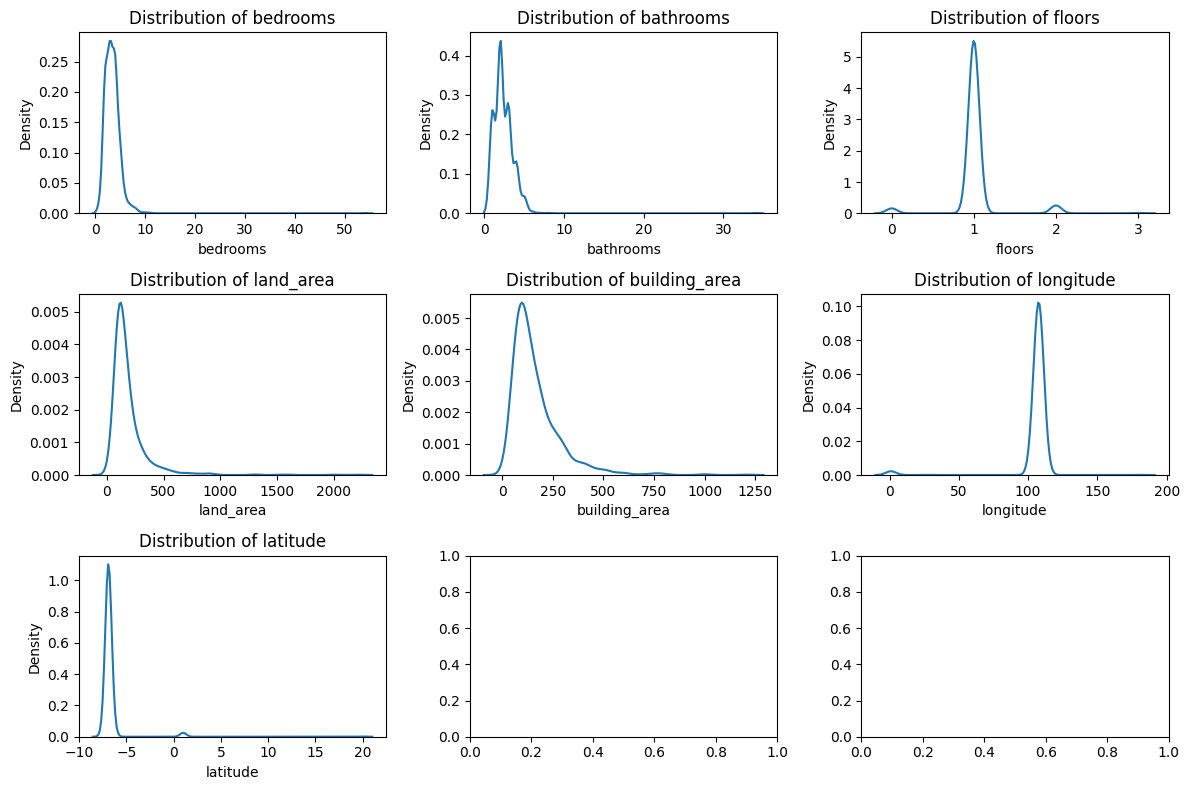

In [ ]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train.columns):
    sns.kdeplot(X_train[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Summary:
- Our data obviously have anomalies, e.g.
  - there's no such thing of 50 `floors` for family-sized house, or
  - 30 bathrooms, or
  - (`longitude`, `latitude`) = (`0`, `0`) are not even in Indonesia.
- We have to clean the data from this anomalies
- We can assume that our numerical data have a skewed distribution, thus we'll use median to imput the missing values.

In [ ]:
X_train.describe()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
count,1142.000000,1139.000000,1137.000000,1128.000000,1136.000000,1187.000000,1187.000000
mean,3.466725,2.396839,1.019349,186.466312,164.384683,105.351897,-6.711368
std,2.005740,1.444531,0.274462,168.919119,122.173535,15.629363,1.380850
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-7.561604
25%,2.000000,2.000000,1.000000,105.000000,90.000000,107.580215,-6.948904
50%,3.000000,2.000000,1.000000,136.500000,126.000000,107.619047,-6.917247
75%,4.000000,3.000000,1.000000,200.000000,200.000000,107.640830,-6.863551
max,54.000000,34.000000,3.000000,2216.000000,1200.000000,180.000000,20.000000


- Let's find the cut-off value of each features

In [ ]:
# this is the anomaly (check it by yourself)
X_train[X_train['bedrooms']>11]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewakan-rumah-siap-huni-pondok-hijau-bandung-uta-168321463721.html,54.0,4.0,2.0,185.0,180.0,107.58247,-6.86157


In [ ]:
# this is the anomaly (check it by yourself)
X_train[X_train['bathrooms']>8]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/sewa-murah-rumah-modern-dlm-cluster-di-kota-baru-p-169927672061.html,4.0,34.0,1.0,126.0,175.0,107.467209,-6.844347


In [ ]:
# This is anomalous
# We can set this and replace it with 1
X_train[X_train['floors']<1]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-tki-v-dalam-cluster-siap-huni-169565454097.html,2.0,1.0,0.0,114.0,51.0,107.380280,-6.821670
https://www.lamudi.co.id/rumah-di-sayap-dago-bandung-utara-169769007720.html,1.0,1.0,0.0,450.0,300.0,107.623445,-6.876258
https://www.lamudi.co.id/rumah-siap-pakai-di-komplek-kota-baru-parahyangan-169769003065.html,4.0,3.0,0.0,306.0,250.0,107.467209,-6.844347
https://www.lamudi.co.id/rumah-modern-full-renov-daerah-tki-v.html,2.0,1.0,0.0,96.0,70.0,107.380280,-6.821670
https://www.lamudi.co.id/disewakan-rumah-tinggal-cantik-daerah-hegarmanah.html,4.0,4.0,0.0,300.0,275.0,107.601390,-6.881670
https://www.lamudi.co.id/rumah-taman-kopo-indah-3-169769001293.html,1.0,1.0,0.0,500.0,400.0,108.251589,-6.387806
https://www.lamudi.co.id/sewa-rumah-minimalis-siap-pakai-komplek-muara-saya-169769007831.html,4.0,2.0,0.0,110.0,NaN,107.621282,-6.954875
https://www.lamudi.co.id/rumah-sangat-strategis-di-mekar-wangi-mainroad.html,3.0,3.0,0.0,300.0,350.0,107.603277,-6.951883
https://www.lamudi.co.id/turun-harga-rumah-komplek-kamandaka-kota-baru-para-169571884645.html,4.0,3.0,0.0,378.0,NaN,107.467209,-6.844347


In [ ]:
# this is the anomaly (check it by yourself)
X_train[X_train['land_area']>1_700]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/rumah-kembar-strategis-dekat-jalan-utama-bkr-bandu-169790695311.html,5.0,3.0,1.0,2000.0,250.0,108.388860,-7.365351
https://www.lamudi.co.id/disewakan-jalan-gunung-batu-169684717079.html,5.0,5.0,1.0,2216.0,600.0,107.618573,-6.863551


In [ ]:
# this is the anomaly (check it by yourself)
X_train[X_train['building_area']>1_000]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-rumah-3-lantai-terawat-nyaman-di-mainroad-d-169701353218.html,8.0,5.0,1.0,899.0,1200.0,107.610171,-6.906996


In [ ]:
# this is the anomaly (check it by yourself)
X_train[X_train['longitude']<=1.0]

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/sewa-rumah-megaraya-sayap-pasteur-169873821723.html,3.0,2.0,1.0,265.0,70.0,1.0,1.0
https://www.lamudi.co.id/rumah-siap-huni-hoek-di-komplek-muara-bandung-170238251288.html,3.0,2.0,1.0,285.0,400.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-singgasana-pradana-bandung-170263850870.html,5.0,3.0,1.0,198.0,130.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-cantik-kbp-169873965115.html,3.0,NaN,1.0,144.0,74.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-muara-baru-kota-bandung-170238285332.html,NaN,NaN,1.0,114.0,122.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-lux-citra-antapani-169995077454.html,4.0,4.0,1.0,287.0,300.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-minimalis-modern-di-citra-green-da-170229570673.html,4.0,4.0,1.0,264.0,244.0,1.0,1.0
https://www.lamudi.co.id/disewa-rumah-di-komplek-perumahan-melong-asih-rege-169873971591.html,4.0,2.0,1.0,98.0,170.0,1.0,1.0
https://www.lamudi.co.id/disewakan-rumah-minimalis-modern-di-citra-green-da-17026384894.html,4.0,4.0,1.0,264.0,244.0,1.0,1.0


- We know that the house is real, but the coordinate is not.
- We can trait the non-Indonesian coordinate as missing values

- Next, explore the `price`

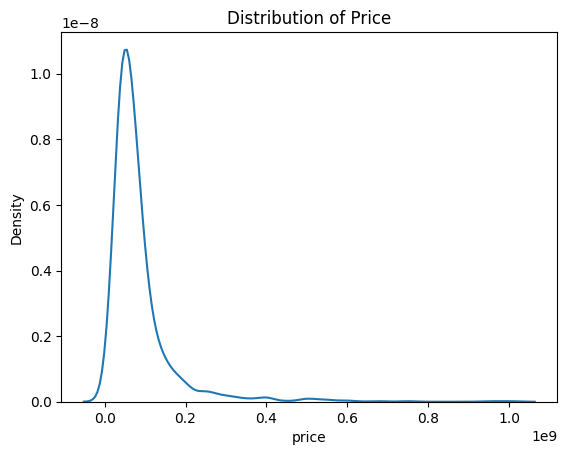

In [ ]:
sns.kdeplot(y_train)
plt.title(f'Distribution of Price')
plt.show()

In [ ]:
# Check for outliers
cond = y_train > 600_000_000
pd.concat((X_train[cond], y_train[cond]), axis=1)

# We will exclude this, these houses are too expensive

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude,price
url,,,,,,,,
https://www.lamudi.co.id/disewa-rumah-3-lantai-terawat-nyaman-di-mainroad-d-169701353218.html,8.0,5.0,1.0,899.0,1200.0,107.610171,-6.906996,1.000000e+09
https://www.lamudi.co.id/disewakan-jalan-gunung-batu-169684717079.html,5.0,5.0,1.0,2216.0,600.0,107.618573,-6.863551,7.500000e+08
https://www.lamudi.co.id/sewa-dago-mainroad-169693284441.html,1.0,NaN,1.0,960.0,400.0,107.678621,-6.946481,9.500000e+08
https://www.lamudi.co.id/mainroad-sukajadi-pasteur-sewa-rumah-di-bandung-ut-169458409481.html,5.0,4.0,1.0,799.0,400.0,107.586670,-6.898330,6.750000e+08


- Explore the relation between features and `price`

In [ ]:
# Concat the data first
train_data = pd.concat((X_train, y_train), axis=1)
train_data.head()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude,price
url,,,,,,,,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,2.0,NaN,1.0,126.0,100.0,107.380280,-6.821670,47500000.0
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,1.0,1.0,NaN,200.0,37.0,107.638060,-6.893330,20000000.0
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,4.0,4.0,1.0,144.0,200.0,107.621282,-6.954875,79000000.0
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,8.0,4.0,1.0,350.0,450.0,107.624440,-6.811670,150000000.0
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,4.0,4.0,1.0,300.0,400.0,107.610560,-6.957220,135000000.0


In [ ]:
# Create a heatmap
# Get the correlation matrix
corr = train_data.corr()
corr

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude,price
bedrooms,1.000000,0.358414,0.098568,0.210908,0.314938,-0.018271,0.027856,0.213710
bathrooms,0.358414,1.000000,0.052360,0.252649,0.411306,-0.031933,0.015465,0.309334
floors,0.098568,0.052360,1.000000,-0.007668,0.050838,-0.053794,0.044919,-0.002645
land_area,0.210908,0.252649,-0.007668,1.000000,0.682693,-0.040833,0.061068,0.693078
building_area,0.314938,0.411306,0.050838,0.682693,1.000000,-0.070606,0.079159,0.713262
longitude,-0.018271,-0.031933,-0.053794,-0.040833,-0.070606,1.000000,-0.887063,-0.070362
latitude,0.027856,0.015465,0.044919,0.061068,0.079159,-0.887063,1.000000,0.065045
price,0.213710,0.309334,-0.002645,0.693078,0.713262,-0.070362,0.065045,1.000000


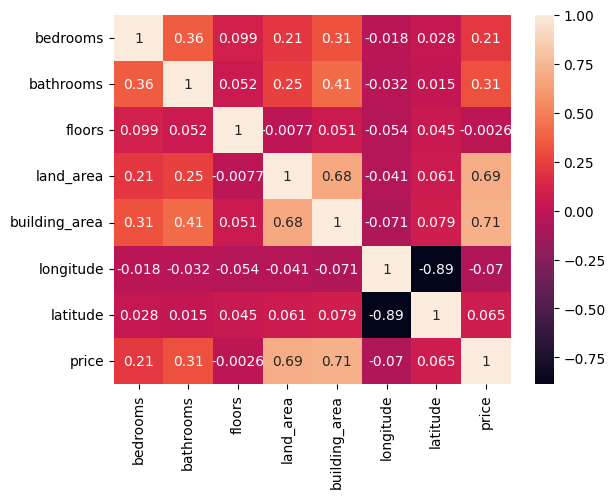

In [ ]:
# Plot the heatmap
sns.heatmap(corr, annot=True)
plt.show()

- We can see, features `bedrooms`, `bathrooms`, `land_area`, and `building_area` have high correlation with `price`.

**Conclusion for preprocessing**
- First, remove the data from anomalous data
- Then, generate imputer.

#### 2.3. Remove & Preprocess Anomalous Data (6 pts)
---

- Let's remove our data from anomalous.
- Please see the EDA to help you remove the anomalous data

In [ ]:
X_train.describe()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
count,1142.000000,1139.000000,1137.000000,1128.000000,1136.000000,1187.000000,1187.000000
mean,3.466725,2.396839,1.019349,186.466312,164.384683,105.351897,-6.711368
std,2.005740,1.444531,0.274462,168.919119,122.173535,15.629363,1.380850
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-7.561604
25%,2.000000,2.000000,1.000000,105.000000,90.000000,107.580215,-6.948904
50%,3.000000,2.000000,1.000000,136.500000,126.000000,107.619047,-6.917247
75%,4.000000,3.000000,1.000000,200.000000,200.000000,107.640830,-6.863551
max,54.000000,34.000000,3.000000,2216.000000,1200.000000,180.000000,20.000000


The floors column was not included for outlier detection because in a floors column of only three values, there are no values that fall far outside this range (for example, 100 or -50). Therefore, there is no reason to look for values that can be considered as outliers.

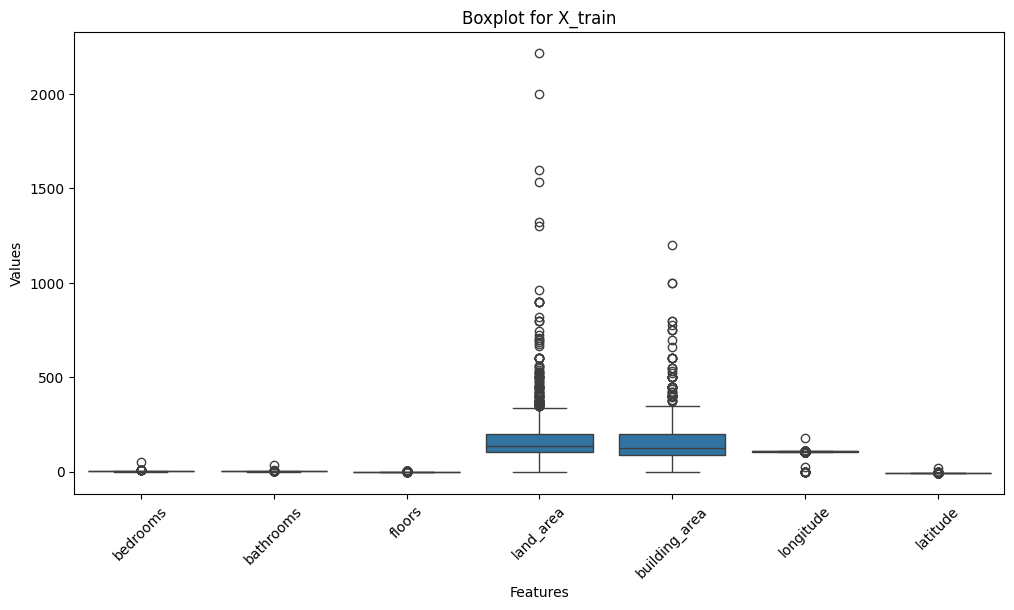

In [ ]:
# Converting X_train to long format for seaborns
X_train_long = X_train.melt(var_name='Features', value_name='Values')

#Create Boxplot for X_train (Before Drop the Anomalous Data)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Features', y='Values', data=X_train_long)
plt.title('Boxplot for X_train')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# # Detect Anomalies in X_train
# def detect_anomalies_iqr(data, columns):
#     """
#     Detect anomalies in X_train using the IQR method.

#     Parameters:
#         data (DataFrame): The dataset to check for anomalies.
#         columns (list): List of numerical columns to check.

#     Returns:
#         list: Indices of rows that are anomalous.
#     """
#     X_train_anomalies = set()
#     for col in columns:
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
#         X_train_anomalies.update(outliers)
#     return list(X_train_anomalies)

# # List of numeric columns in X_train
# numeric_columns = ['bedrooms', 'bathrooms', 'land_area', 'building_area', 'longitude', 'latitude']

# # Detect anomalies in X_train
# X_train_anomalies_final = detect_anomalies_iqr(X_train, numeric_columns)
# X_train_anomalies_final = pd.DataFrame({'url': X_train_anomalies_final})
# print(f'Total Anomalies in X_train: {len(X_train_anomalies_final)}')
# print(' ')
# X_train_anomalies_final

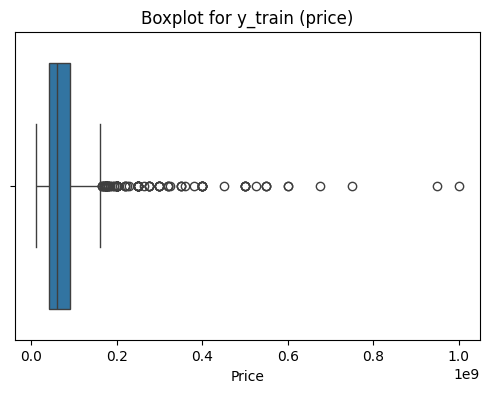

In [ ]:
# Create Boxplot for y_train (Before Drop the Outlier Data)
plt.figure(figsize=(6, 4))
sns.boxplot(x=y_train)
plt.title('Boxplot for y_train (price)')
plt.xlabel('Price')
plt.show()

In [ ]:
# # Detect Outlier Indices in y_train
# # Initialize an empty list to collect indices of outliers
# # Calculate IQR for y_train
# Q1 = y_train.quantile(0.25)
# Q3 = y_train.quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Detect indices outside the bounds
# outlier_indices_y_train = y_train[(y_train < lower_bound) | (y_train > upper_bound)].index
# outlier_indices_y_train = pd.DataFrame(outlier_indices_y_train, columns=['url'])
# print(f'Total Outlier in y_train: {len(outlier_indices_y_train)}')
# print(' ')
# outlier_indices_y_train

In [ ]:
######################################################################
# Find the data index to drop
# Remember to carefully read the EDA part
# Save the dropped index to idx_to_drop (list of index)
# Write your code here (2 pts)
######################################################################

# Append X_train_anomalies_final and outlier_indices_y_train
# idx_to_drop = X_train_anomalies_final._append(outlier_indices_y_train).drop_duplicates()
# idx_to_drop = idx_to_drop.values.flatten().tolist()

# print(combined_list)
idx_to_drop = X_train[(X_train['bedrooms']>11) | (X_train['bathrooms']>8) | (X_train['floors']<1) | (X_train['land_area']>1_700) | (X_train['building_area']>1_000) | (X_train['building_area']==0) | (X_train['land_area']==0) | (X_train['longitude']<=1.0)]
idx_to_drop = idx_to_drop.index.tolist()

In [ ]:
# Check the index (JUST RUN THE CODE)
print(f'Percentage Number of Dropped Data: {round(len(idx_to_drop) / len(X_train) * 100, 2)}%')
print(f'Number of index to drop:', len(idx_to_drop))
idx_to_drop

Percentage Number of Dropped Data: 5.29%
Number of index to drop: 63


['https://www.lamudi.co.id/disewa-tki-v-dalam-cluster-siap-huni-169565454097.html',
 'https://www.lamudi.co.id/sewa-rumah-megaraya-sayap-pasteur-169873821723.html',
 'https://www.lamudi.co.id/rumah-di-sayap-dago-bandung-utara-169769007720.html',
 'https://www.lamudi.co.id/sewa-murah-rumah-modern-dlm-cluster-di-kota-baru-p-169927672061.html',
 'https://www.lamudi.co.id/rumah-siap-huni-hoek-di-komplek-muara-bandung-170238251288.html',
 'https://www.lamudi.co.id/disewakan-rumah-singgasana-pradana-bandung-170263850870.html',
 'https://www.lamudi.co.id/disewakan-rumah-cantik-kbp-169873965115.html',
 'https://www.lamudi.co.id/rumah-siap-pakai-di-komplek-kota-baru-parahyangan-169769003065.html',
 'https://www.lamudi.co.id/rumah-modern-full-renov-daerah-tki-v.html',
 'https://www.lamudi.co.id/disewakan-rumah-tinggal-cantik-daerah-hegarmanah.html',
 'https://www.lamudi.co.id/rumah-kembar-strategis-dekat-jalan-utama-bkr-bandu-169790695311.html',
 'https://www.lamudi.co.id/disewakan-rumah-muara-b

- Now, lets drop the data for `X_train` and also `y_train`

In [ ]:
######################################################################
# Drop the anomalous data
# Save the dropped data into X_train_dropped and y_train_dropped
# Write your code here (1 pts)
######################################################################
# Drop data berdasarkan indeks anomali
X_train_dropped = X_train.drop(index=idx_to_drop)
y_train_dropped = y_train.drop(index=idx_to_drop)

In [ ]:
# Validate (JUST RUN THE CODE)
print('Shape of X train after dropped:', X_train_dropped.shape)
X_train_dropped.head()

Shape of X train after dropped: (1129, 7)


,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,2.0,NaN,1.0,126.0,100.0,107.380280,-6.821670
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,1.0,1.0,NaN,200.0,37.0,107.638060,-6.893330
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,4.0,4.0,1.0,144.0,200.0,107.621282,-6.954875
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,8.0,4.0,1.0,350.0,450.0,107.624440,-6.811670
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,4.0,4.0,1.0,300.0,400.0,107.610560,-6.957220


In [ ]:
# Validate (JUST RUN THE CODE)
print('Shape of y train after dropped:', y_train_dropped.shape)
y_train_dropped.head()

Shape of y train after dropped: (1129,)


,price
url,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,47500000.0
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,20000000.0
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,79000000.0
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,150000000.0
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,135000000.0


- Great!
- Next, we replace the missing `longitude` and `latitude` to `np.nan`
- Please recall the definition of missing `longitude` and `latitude` in the EDA section

In [ ]:
print('X_train_dropped summary:')
X_train_dropped.info()

X_train_dropped summary:
<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html to https://www.lamudi.co.id/di-sewakan-rumah-siap-pakai-di-komplek-cigadung-170355407857.html
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       1082 non-null   float64
 1   bathrooms      1081 non-null   float64
 2   floors         1074 non-null   float64
 3   land_area      1068 non-null   float64
 4   building_area  1078 non-null   float64
 5   longitude      1124 non-null   float64
 6   latitude       1124 non-null   float64
dtypes: float64(7)
memory usage: 70.6+ KB


In [ ]:
print('y_train_dropped summary:')
y_train_dropped.info()

y_train_dropped summary:
<class 'pandas.core.series.Series'>
Index: 1129 entries, https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html to https://www.lamudi.co.id/di-sewakan-rumah-siap-pakai-di-komplek-cigadung-170355407857.html
Series name: price
Non-Null Count  Dtype  
--------------  -----  
1129 non-null   float64
dtypes: float64(1)
memory usage: 17.6+ KB


In [ ]:
print('Inspect Top 10 Rows in X_train_dropped:')
X_train_dropped.head(10)

Inspect Top 10 Rows in X_train_dropped:


,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,2.0,NaN,1.0,126.0,100.0,107.380280,-6.821670
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,1.0,1.0,NaN,200.0,37.0,107.638060,-6.893330
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,4.0,4.0,1.0,144.0,200.0,107.621282,-6.954875
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,8.0,4.0,1.0,350.0,450.0,107.624440,-6.811670
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,4.0,4.0,1.0,300.0,400.0,107.610560,-6.957220
https://www.lamudi.co.id/rumah-siap-huni-jl-hegarmanah-bandung-169571871640.html,6.0,4.0,1.0,423.0,380.0,107.601390,-6.881670
https://www.lamudi.co.id/disewa-rumah-nyaman-dan-aman-di-arcamanik-antapani-168985807334.html,2.0,3.0,1.0,178.0,70.0,107.693391,-6.929506
https://www.lamudi.co.id/disewakan-rumah-3-lantai-area-dago-16969367290.html,3.0,2.0,NaN,NaN,35.0,107.623445,-6.876258
https://www.lamudi.co.id/rumah-di-sudirman-henny-169572687676.html,1.0,1.0,1.0,460.0,300.0,107.586350,-6.918636


In [ ]:
print('Inspect Top 10 Rows in y_train_dropped:')
y_train_dropped.head(10)

Inspect Top 10 Rows in y_train_dropped:


,price
url,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,47500000.0
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,20000000.0
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,79000000.0
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,150000000.0
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,135000000.0
https://www.lamudi.co.id/rumah-siap-huni-jl-hegarmanah-bandung-169571871640.html,165000000.0
https://www.lamudi.co.id/disewa-rumah-nyaman-dan-aman-di-arcamanik-antapani-168985807334.html,50000000.0
https://www.lamudi.co.id/disewakan-rumah-3-lantai-area-dago-16969367290.html,41000000.0
https://www.lamudi.co.id/rumah-di-sudirman-henny-169572687676.html,60000000.0


In [ ]:
######################################################################
# Replace the missing longitude and latitude to np.nan
# Write your code here (2 pts)
######################################################################
X_train_dropped['latitude'] = X_train_dropped['latitude'].fillna(np.nan)
X_train_dropped['longitude'] = X_train_dropped['longitude'].fillna(np.nan)

- Then, replace the `floors` of 0.0 to 1.0

In [ ]:
######################################################################
# Replace the 0.0 floors to 1.0
# Write your code here (1 pts)
######################################################################
X_train_dropped['floors'] = X_train_dropped['floors'].fillna(X_train_dropped['floors'].mode()[0])

In [ ]:
X_train_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html to https://www.lamudi.co.id/di-sewakan-rumah-siap-pakai-di-komplek-cigadung-170355407857.html
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       1082 non-null   float64
 1   bathrooms      1081 non-null   float64
 2   floors         1129 non-null   float64
 3   land_area      1068 non-null   float64
 4   building_area  1078 non-null   float64
 5   longitude      1124 non-null   float64
 6   latitude       1124 non-null   float64
dtypes: float64(7)
memory usage: 70.6+ KB


In [ ]:
# Validate (JUST RUN THE CODE)
X_train_dropped.describe()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
count,1082.000000,1081.000000,1129.000000,1068.000000,1078.000000,1124.000000,1124.000000
mean,3.408503,2.354302,1.042516,180.435393,160.768089,107.595841,-6.877190
std,1.321368,1.088365,0.210452,146.737180,115.860072,3.216825,0.812841
min,1.000000,1.000000,1.000000,30.000000,25.000000,28.000000,-7.561604
25%,2.000000,2.000000,1.000000,105.000000,90.000000,107.584720,-6.948904
50%,3.000000,2.000000,1.000000,135.000000,125.000000,107.621282,-6.920280
75%,4.000000,3.000000,1.000000,200.000000,200.000000,107.646660,-6.871063
max,11.000000,8.000000,3.000000,1600.000000,1000.000000,180.000000,20.000000


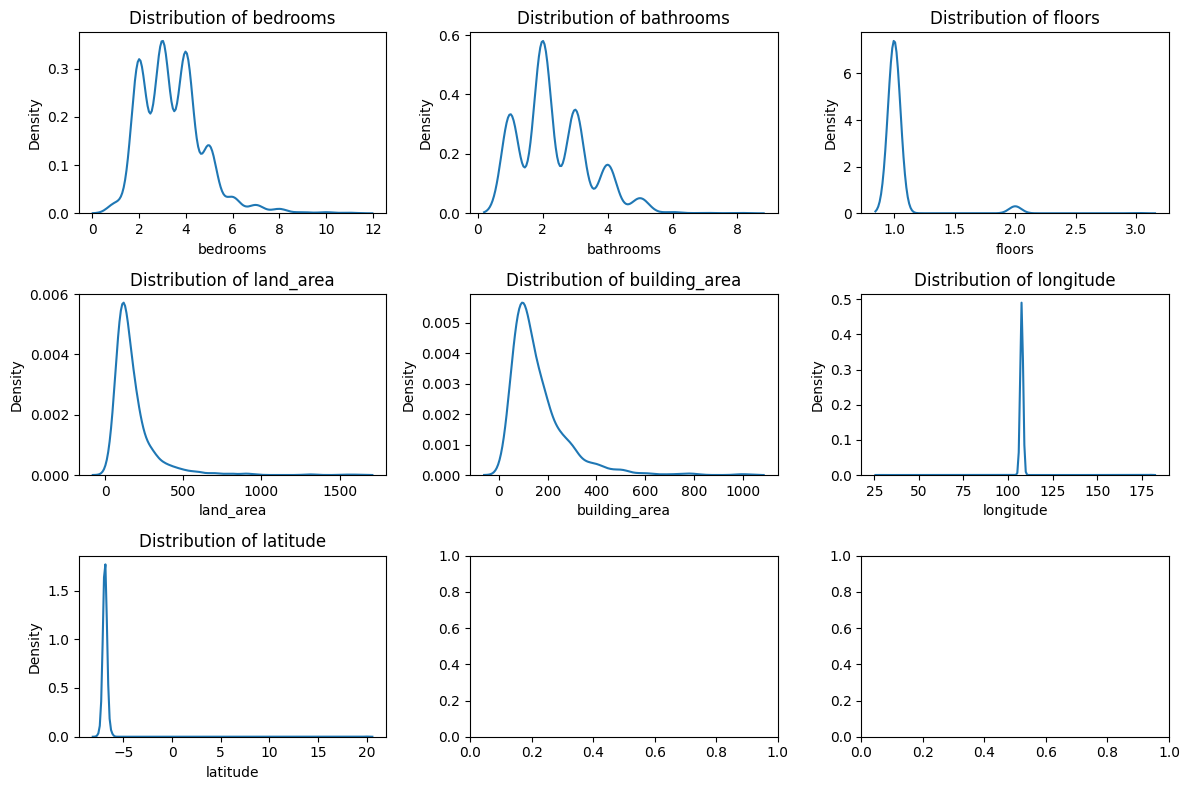

In [ ]:
# Plot histogram (JUST RUN THE CODE)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_dropped.columns):
    sns.kdeplot(X_train_dropped[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

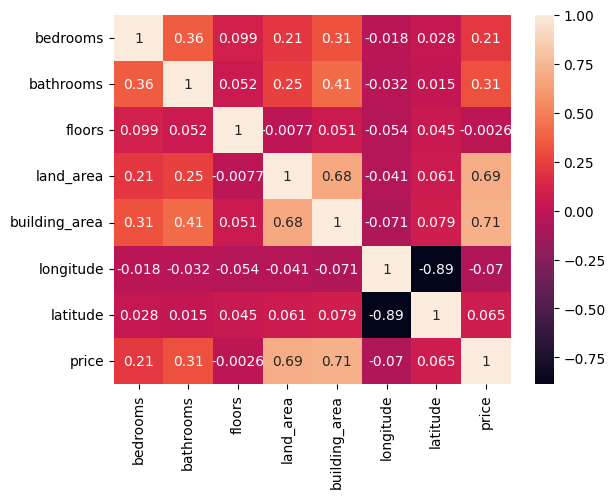

In [ ]:
# Create a heatmap (JUST RUN THE CODE)
corr = train_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

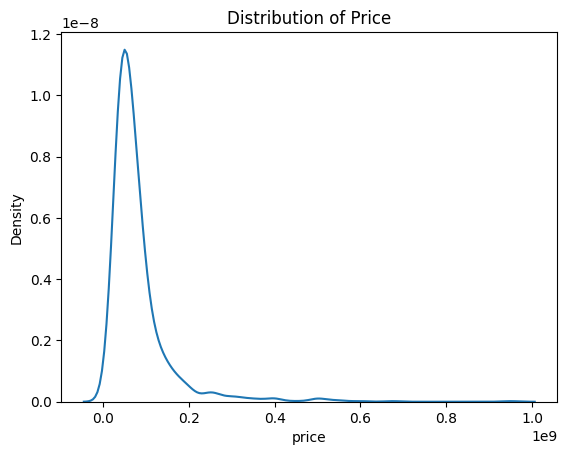

In [ ]:
# Visualize price distribution (JUST RUN THE CODE)
sns.kdeplot(y_train_dropped)
plt.title(f'Distribution of Price')
plt.show()

#### 2.4. Create Imputation (3 pts)
---

- Now, let's perform a numerical imputation (because all features are numerical)
- First check the missing value of the numerical data

In [ ]:
# Check missing value (JUST RUN THE CODE)
X_train_dropped.isna().sum(0)

,0
bedrooms,47
bathrooms,48
floors,0
land_area,61
building_area,51
longitude,5
latitude,5


- Create a function to fit a numerical features imputer

In [ ]:
####################################################
# Create function to fit & transform numerical imputers
# The fit function is called by num_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is np.nan
# - the imputation strategy is median
# - it return the imputer
#
# The transform function is called by num_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################

from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Function to fit the numerical imputer
def num_imputer_fit(data: pd.DataFrame):
    """
    Fit a SimpleImputer with median strategy.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.

    Returns:
        SimpleImputer: The fitted imputer object.
    """
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    imputer.fit(data)
    return imputer

# Function to transform data using the fitted imputer
def num_imputer_transform(data: pd.DataFrame, imputer: SimpleImputer):
    """
    Transform the data using a fitted SimpleImputer.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.
        imputer (SimpleImputer): The fitted imputer object.

    Returns:
        pd.DataFrame: The imputed DataFrame.
    """
    imputed_data = imputer.transform(data)
    return pd.DataFrame(imputed_data, columns=data.columns, index=data.index)

- Perform imputation

In [ ]:
# Get the numerical imputer
num_imputer = num_imputer_fit(X_train_dropped)

# Transform the data
X_train_imputed = num_imputer_transform(X_train_dropped, num_imputer)

In [ ]:
# Validate (JUST RUN THE CODE)
X_train_imputed.isna().sum(0)

,0
bedrooms,0
bathrooms,0
floors,0
land_area,0
building_area,0
longitude,0
latitude,0


Great!

#### 2.5. Feature engineering the data (3 pts)
---

- We standardize the data so that it can perform well during model optimization (4 pts)

In [ ]:
####################################################
# Create two functions to perform scaling & transform scaling
# The scaling is Standardization
# The first function is to fit the scaler, called by fit_scaler
# - You need an input, a data (pd.Dataframe)
# - You create a standardization scaler (please use sklearn)
# - Your output is the scaler
#
# The second function is to transform data using scaler, called by transform_scaler
# - There are two inputs, a data (pd.Dataframe), a scaler (sklearn object)
# - You scaled the data, then return the scaled data
# Write your code here
####################################################
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Function to fit the scaler
def fit_scaler(data: pd.DataFrame):
    """
    Fit a StandardScaler on the input data.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.

    Returns:
        StandardScaler: The fitted scaler object.
    """
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler

# Function to transform data using the fitted scaler
def transform_scaler(data: pd.DataFrame, scaler: StandardScaler):
    """
    Transform the data using a fitted StandardScaler.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.
        scaler (StandardScaler): The fitted scaler object.

    Returns:
        pd.DataFrame: The scaled DataFrame.
    """
    scaled_data = scaler.transform(data)
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

In [ ]:
# Fit the scaler
scaler = fit_scaler(X_train_imputed)

# Transform the scaler
X_train_clean = transform_scaler(X_train_imputed, scaler)

In [ ]:
# Validate that the Data have properly scaled
unscaled_columns = X_train_clean.columns[(X_train_clean.mean().abs() > 1e-6) | ((X_train_clean.std() - 1).abs() > 1e-3)]
print("Columns not properly scaled:", unscaled_columns)

Columns not properly scaled: Index([], dtype='object')


In [ ]:
#Validate X_train_clean
X_train_clean.head()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,-1.074062,-0.317971,-0.202109,-0.363448,-0.521607,-0.067224,0.068720
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,-1.845937,-1.255282,-0.202109,0.153960,-1.077143,0.013124,-0.019674
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,0.469689,1.556649,-0.202109,-0.237592,0.360196,0.007895,-0.095591
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,3.557190,1.556649,-0.202109,1.202761,2.564703,0.008879,0.081056
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,0.469689,1.556649,-0.202109,0.853161,2.123802,0.004553,-0.098484


In [ ]:
#Validate X_train_clean
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html to https://www.lamudi.co.id/di-sewakan-rumah-siap-pakai-di-komplek-cigadung-170355407857.html
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       1129 non-null   float64
 1   bathrooms      1129 non-null   float64
 2   floors         1129 non-null   float64
 3   land_area      1129 non-null   float64
 4   building_area  1129 non-null   float64
 5   longitude      1129 non-null   float64
 6   latitude       1129 non-null   float64
dtypes: float64(7)
memory usage: 102.9+ KB


In [ ]:
# Validate (JUST RUN THE CODE)
X_train_clean.describe().round(4)

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
count,1129.0000,1129.0000,1129.0000,1129.0000,1129.0000,1129.0000,1129.0000
mean,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004
min,-1.8459,-1.2553,-0.2021,-1.0347,-1.1830,-24.8096,-0.8440
25%,-1.0741,-0.3180,-0.2021,-0.5103,-0.6098,-0.0035,-0.0882
50%,-0.3022,-0.3180,-0.2021,-0.3005,-0.3012,0.0079,-0.0529
75%,0.4697,0.6193,-0.2021,0.1540,0.3602,0.0153,0.0074
max,5.8728,5.3059,9.3054,9.9428,7.4146,22.5680,33.1540


Great!

#### 2.6. Create the preprocess function (4 pts)
---

- Now, let's create a function to preprocess other set of data (valid & test) so that we can predict that

In [ ]:
####################################################
# Create a function to preprocess the dataset
# You called the function preprocess_data
# - It needs many input
#   - data, pd.DataFrame
#   - num_imputer, the numerical imputer, sklearn object
#   - scaler, the data scaler, sklearn object
# - You preprocess the data following step 2.4 - 2.5
# - You return the clean data
#
# Write your code here
####################################################
def preprocess_data(data: pd.DataFrame, num_imputer: SimpleImputer, scaler: StandardScaler):
    """
    Preprocess the input data by imputing missing values and scaling numerical features.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.
        num_imputer (SimpleImputer): The fitted imputer object.
        scaler (StandardScaler): The fitted scaler object.

    Returns:
        pd.DataFrame: The cleaned and scaled DataFrame.
    """
    print('Original data shape: ',data.shape)

    # Step 2.4: Impute missing values using the fitted numerical imputer
    imputed_data = num_imputer_transform(data, num_imputer)

    # Step 2.5: Scale the imputed data using the fitted scaler
    scaled_data = transform_scaler(imputed_data, scaler)

    print('Cleaned data shape: ',data.shape)
    return scaled_data

# Assuming you've already fitted the imputer and scaler
num_imputer = num_imputer_fit(X_train_dropped)  # Fit the imputer
scaler = fit_scaler(X_train_dropped)  # Fit the scaler

In [ ]:
# Preprocess the data training again
y_train_clean = y_train_dropped
X_train_clean = preprocess_data(X_train_dropped, num_imputer, scaler)

Original data shape:  (1129, 7)
Cleaned data shape:  (1129, 7)


In [ ]:
# Validate (JUST RUN THE CODE)
X_train_clean.head()

,bedrooms,bathrooms,floors,land_area,building_area,longitude,latitude
url,,,,,,,
https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html,-1.066435,-0.325686,-0.202109,-0.371146,-0.524739,-0.067040,0.068334
https://www.lamudi.co.id/disewakan-rumah-nyaman-berdampingan-di-cikutra-169381583375.html,-1.823577,-1.244920,-0.202109,0.133393,-1.068751,0.013130,-0.019865
https://www.lamudi.co.id/rumah-nyaman-full-furnish-di-cluster-setra-duta-ba-169382206322.html,0.447847,1.512782,-0.202109,-0.248420,0.338772,0.007912,-0.095615
https://www.lamudi.co.id/disewa-rumah-siap-huni-terawat-strategis-di-buah-b-169621193557.html,3.476411,1.512782,-0.202109,1.156108,2.497549,0.008895,0.080642
https://www.lamudi.co.id/rumah-bagus-di-mekar-wangi-di-bandung-bojong-loa-170037510330.html,0.447847,1.512782,-0.202109,0.815203,2.065793,0.004578,-0.098501


In [ ]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, https://www.lamudi.co.id/disewa-rumah-baru-minimalis-di-taman-kopo-indah-5-170061569879.html to https://www.lamudi.co.id/di-sewakan-rumah-siap-pakai-di-komplek-cigadung-170355407857.html
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       1129 non-null   float64
 1   bathrooms      1129 non-null   float64
 2   floors         1129 non-null   float64
 3   land_area      1129 non-null   float64
 4   building_area  1129 non-null   float64
 5   longitude      1129 non-null   float64
 6   latitude       1129 non-null   float64
dtypes: float64(7)
memory usage: 102.9+ KB


In [ ]:
# Transform other set of data
X_valid_clean = preprocess_data(X_valid, num_imputer, scaler)

X_test_clean = preprocess_data(X_test, num_imputer, scaler)

Original data shape:  (149, 7)
Cleaned data shape:  (149, 7)
Original data shape:  (149, 7)
Cleaned data shape:  (149, 7)


### 3. Training Machine Learning Models (43 pts)
---

```
3.1 Prepare model evaluation function
3.2 Train & evaluate several models
3.3 Choose the best model
```

#### 3.1. Preprare model evaluation function (10 pts)
---

- Before modeling, let's prepare two functions
  - `extract_cv_results`: to return the score and best param from hyperparameter search
  - `evaluate_model`: to return the RMSE of a model

In [ ]:
####################################################
# First, create a function to extract the CV results
# - The function name is extract_cv_results
# - It needs one input, called by `cv_obj` (a GridSearchCV sklearn object)
# - It returns three output:
#   1. the CV score on train set (float)
#   2. the CV score on valid set (float)
#   3. The best params (dictionary)
#
#
# Next, create a function to evaluate model called `rmse`
# - It needs 2 input
#   - y_actual, the actual output (pd.DataFrame or numpy array)
#   - y_pred, the predicted output (pd.DataFrame or numpy array)
# - You calculate the model performance using root mean squared error metrics
# - Then return the rmse
#
# Write your code here
####################################################

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

def extract_cv_results(cv_obj: GridSearchCV):
    """
    Extract train and validation scores and the best hyperparameters.

    Parameters:
    cv_obj (GridSearchCV): A fitted GridSearchCV object.

    Returns:
    tuple: Contains:
        - Train score for the best parameter set (float)
        - Validation score for the best parameter set (float)
        - Best parameters (dict)
    """
    # Ensure the train scores are available
    if "mean_train_score" not in cv_obj.cv_results_:
        raise ValueError("Train scores are not available. Set `return_train_score=True` in GridSearchCV.")

    # Extract train and validation scores
    best_index = cv_obj.best_index_
    best_train_score = -cv_obj.cv_results_['mean_train_score'][best_index]
    best_valid_score = -cv_obj.cv_results_['mean_test_score'][best_index]

    # Extract best parameters
    best_params = cv_obj.best_params_

    return best_train_score, best_valid_score, best_params

def rmse(y_actual, y_pred):
    # Calculate RMSE
    rmse_value = np.sqrt(mean_squared_error(y_actual, y_pred))
    return rmse_value

# Custom scoring metric for RMSE
rmse_scorer = make_scorer(rmse, greater_is_better=False)

#### 3.2. Train and Cross Validate Several Models (23 pts)
---

- Now, let's train & evaluate several models
- You should check, which one of the following model is the best model

  1. Baseline model (**3 pts**)
  2. k-NN (**3 pts**)
  3. Linear Regression (**4 pts**)
  4. Decision Tree (**4 pts**)
  5. Ridge (**4 pts**)
  6. Lasso (**4 pts**)

- We're going to perform a `GridSearchCV`, with
  - number of CV = 10
  - scoring = root mean squared error
  - return the train score

In [ ]:
####################################################
# Import sklearn library of those six models + gridsearchcv
# Write your code here
# This is 1 pts
####################################################
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

---
##### Perform CV for baseline model (3 pts)
- Return as `reg_base`

In [ ]:
####################################################
# Perform GridSearchCV for Baseline model
# return the results as reg_base
# Write your code here
####################################################
# Baseline model (Dummy Regressor)
baseline_model = DummyRegressor(strategy='mean')

# Hyperparameter grid (since baseline model does not have hyperparameters)
param_grid_base = {}

# Perform GridSearchCV for Baseline model
reg_base = GridSearchCV(estimator=baseline_model, param_grid=param_grid_base,
                        cv=10, scoring=rmse_scorer,  return_train_score=True)

# Fit the model to the training data (replace X_train_clean and y_train_clean with your actual data)
reg_base.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=10, estimator=DummyRegressor(), param_grid={},
             return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [ ]:
# Validate the CV Score (JUST RUN THE CODE)
train_base, valid_base, best_param_base = extract_cv_results(reg_base)

print(f'Train score - Baseline model: {train_base/(10**6):.2f} Juta')
print(f'Valid score - Baseline model: {valid_base/(10**6):.2f} Juta')
print(f'Best Params - Baseline model: {best_param_base}')

Train score - Baseline model: 76.61 Juta
Valid score - Baseline model: 75.16 Juta
Best Params - Baseline model: {}


---
##### Perform CV for k-NN Model (3 pts)
- Do a parameter search for `k = {1, 10, 25, 50, 100, 150, 200, 250}`
- Return as `reg_knn`

In [ ]:
####################################################
# Perform GridSearchCV for kNN model
# return the results as reg_knn
# Write your code here
####################################################
# Assuming X_train and y_train are your training features and target

# Define the k-NN model
knn = KNeighborsRegressor()

# Define the parameter grid to search over
param_grid_knn = {'n_neighbors': [1, 10, 25, 50, 100, 150, 200, 250]}

# Perform GridSearchCV
reg_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring=rmse_scorer, return_train_score=True)

# Fit the model to the data
reg_knn.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 10, 25, 50, 100, 150, 200, 250]},
             return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [ ]:
# Validate the CV Score (JUST RUN THE CODE)
train_knn, valid_knn, best_param_knn = extract_cv_results(reg_knn)

print(f'Train score - kNN model: {train_knn/(10**6):.2f} Juta')
print(f'Valid score - kNN model: {valid_knn/(10**6):.2f} Juta')
print(f'Best Params - kNN model: {best_param_knn}')

Train score - kNN model: 48.45 Juta
Valid score - kNN model: 52.22 Juta
Best Params - kNN model: {'n_neighbors': 10}


---
##### Perform CV for Linear Regression Model (4 pts)
- Return as `reg_lr`

In [ ]:
####################################################
# Perform GridSearchCV for Linear Regression model
# return the results as reg_lr
# Write your code here
####################################################

# Define the Linear Regression model
lr = LinearRegression()

# Define the parameter grid to search over
param_grid_lr = {'fit_intercept': [True]}

# Perform GridSearchCV
reg_lr = GridSearchCV(lr, param_grid_lr, cv=10, scoring=rmse_scorer,  return_train_score=True)

# Fit the model to the data
reg_lr.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True]}, return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [ ]:
# Validate the CV Score (JUST RUN THE CODE)
train_lr, valid_lr, best_param_lr = extract_cv_results(reg_lr)

print(f'Train score - LinReg model: {train_lr/(10**6):.2f} Juta')
print(f'Valid score - LinReg model: {valid_lr/(10**6):.2f} Juta')
print(f'Best Params - LinReg model: {best_param_lr}')

Train score - LinReg model: 50.34 Juta
Valid score - LinReg model: 51.03 Juta
Best Params - LinReg model: {'fit_intercept': True}


---
##### Perform CV for Decision Tree Model (4 pts)
- You search the best hyperparameter from
  - maximum depth : 2, 10, 30, 100, None
  - minimum samples required to split : 2, 25, 50, 100, 150
  - minimum samples at leaf : 2, 5, 10, 20
- Return as `reg_dt`

In [ ]:
####################################################
# Perform GridSearchCV for Decision Tree model
# return the results as reg_dt
# Write your code here
####################################################
# Define the Decision Tree model
dt = DecisionTreeRegressor()

# Define the parameter grid to search over
param_grid_dt = {
    'max_depth': [2, 10, 30, 100, None],
    'min_samples_split': [2, 25, 50, 100, 150],
    'min_samples_leaf': [2, 5, 10, 20]
}

# Perform GridSearchCV
reg_dt = GridSearchCV(dt, param_grid_dt, cv=10, scoring=rmse_scorer,  return_train_score=True)

# Fit the model to the data
reg_dt.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 10, 30, 100, None],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 25, 50, 100, 150]},
             return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [ ]:
# Validate the CV Score (JUST RUN THE CODE)
train_dt, valid_dt, best_param_dt = extract_cv_results(reg_dt)

print(f'Train score - Decision Tree model: {train_dt/(10**6):.2f} Juta')
print(f'Valid score - Decision Tree model: {valid_dt/(10**6):.2f} Juta')
print(f'Best Params - Decision Tree model: {best_param_dt}')

Train score - Decision Tree model: 44.39 Juta
Valid score - Decision Tree model: 51.61 Juta
Best Params - Decision Tree model: {'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 2}


---
##### Perform CV for Ridge Model (4 pts)
- You search the best hyperparameter from
  - regularization strength: [$10^{-6}$, ..., $10^{10}$],
- Return as `reg_ridge`

In [ ]:
####################################################
# Perform GridSearchCV for Ridge model
# return the results as reg_ridge
# Write your code here
####################################################

# Define the Ridge regression model
ridge = Ridge()

# Define the parameter grid to search over
param_grid_ridge = {'alpha': np.logspace(-6, 10, 17)}  # alpha ranges from 10^-6 to 10^10

# Perform GridSearchCV
reg_ridge = GridSearchCV(ridge, param_grid_ridge, cv=10, scoring=rmse_scorer, return_train_score=True)

# Fit the model to the data
reg_ridge.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09,
       1.e+10])},
             return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [ ]:
# Validate the CV Score (JUST RUN THE CODE)
train_ridge, valid_ridge, best_param_ridge = extract_cv_results(reg_ridge)

print(f'Train score - Ridge model: {train_ridge/(10**6):.2f} Juta')
print(f'Valid score - Ridge model: {valid_ridge/(10**6):.2f} Juta')
print(f'Best Params - Ridge model: {best_param_ridge}')

Train score - Ridge model: 50.49 Juta
Valid score - Ridge model: 50.03 Juta
Best Params - Ridge model: {'alpha': 100.0}


---
##### Perform CV for Lasso Model (4 pts)
- You search the best hyperparameter from
  - regularization strength: [$10^{-6}$, ..., $10^{10}$]
- Return as `reg_lasso`

In [ ]:
####################################################
# Perform GridSearchCV for Lasso model
# return the results as reg_lasso
# Write your code here
####################################################
# Define the Lasso regression model
lasso = Lasso()

# Define the parameter grid to search over
param_grid_lasso = {'alpha': np.logspace(-6, 10, 17)}  # alpha ranges from 10^-6 to 10^10

# Perform GridSearchCV
reg_lasso = GridSearchCV(lasso, param_grid_lasso, cv=10, scoring=rmse_scorer,  return_train_score=True)

# Fit the model to the data
reg_lasso.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09,
       1.e+10])},
             return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [ ]:
# Validate the CV Score (JUST RUN THE CODE)
train_lasso, valid_lasso, best_param_lasso = extract_cv_results(reg_lasso)

print(f'Train score - Lasso model: {train_lasso/(10**6):.2f} Juta')
print(f'Valid score - Lasso model: {valid_lasso/(10**6):.2f} Juta')
print(f'Best Params - Lasso model: {best_param_lasso}')

Train score - Lasso model: 50.42 Juta
Valid score - Lasso model: 50.09 Juta
Best Params - Lasso model: {'alpha': 1000000.0}


#### 3.3. Choose the best model (10 pts)
---

Lets summarize the model

In [ ]:
# Summarize (JUST RUN THE CODE)
summary_df = pd.DataFrame(
    data={
        'model': ['Baseline', 'kNN', 'Linear Regression', 'Decision Tree', 'Ridge', 'Lasso'],
        'train_score': [train_base, train_knn, train_lr, train_dt, train_ridge, train_lasso],
        'valid_score': [valid_base, valid_knn, valid_lr, valid_dt, valid_ridge, valid_lasso],
        'best_params': [best_param_base, best_param_knn, best_param_lr, best_param_dt, best_param_ridge, best_param_lasso]
    }
)

summary_df['train_score'] /= 10**6
summary_df['valid_score'] /= 10**6
summary_df

,model,train_score,valid_score,best_params
0,Baseline,76.608979,75.164424,{}
1,kNN,48.451753,52.222562,{'n_neighbors': 10}
2,Linear Regression,50.338551,51.034785,{'fit_intercept': True}
3,Decision Tree,44.392913,51.605282,"{'max_depth': 30, 'min_samples_leaf': 10, 'min..."
4,Ridge,50.488013,50.028608,{'alpha': 100.0}
5,Lasso,50.418075,50.093875,{'alpha': 1000000.0}


From the previous results, which one is the best model? (3 pts)

```
The best Model is Ridge

```

Why do you choose that model? (3 pts)

```
To determine the best model, we should focus on the valid score (because valid score gives an idea of the model's performance on data that was not seen before) and choose the model with the lowest valid score (because lower RMSE indicates better performance).
  •	kNN has a valid score of 52.22
  •	Linear Regression has a valid score of 51.03
  •	Decision Tree has a valid score of 51.60
  •	Ridge has a valid score of 50.03
  •	Lasso has a valid score of 50.09
  •	Baseline has a valid score of 75.16 (worse than other models).

Conclusion: The Ridge model with a valid score of 50.20 was the best, followed by Lasso with a very similar valid score (50.03). Both models have very good valid score performance.

```

And, create a `reg_best` to store the best model

In [ ]:
#####################################################################
# Recreate or retrain your best regression model
# Set is as reg_best
# Write your code in here (4 pts)
#####################################################################

# Best parameters for Ridge
best_params_ridge = {'alpha': 100.0}

# Initialize the Ridge model with the best parameters
reg_best = Ridge(**best_params_ridge)

# Fit the model to the training data
reg_best.fit(X_train_clean, y_train_clean)

Ridge(alpha=100.0)

### 4. Predictions & Evaluations (JUST RUN THE CODE)
---

```
4.1 Predict & Evaluate on the Train Data
4.2 Predict & Evaluate on the Test Data
```

#### 4.1. Predict & evaluate on train & valid data
---

In [ ]:
# Predict (JUST RUN THE CODE)
y_train_pred = reg_best.predict(X_train_clean)

In [ ]:
# Find error (JUST RUN THE CODE)
train_error = rmse(y_train_dropped, y_train_pred)
print(f'RMSE on Train data: {train_error/10**6:.2f} Juta')

RMSE on Train data: 50.53 Juta


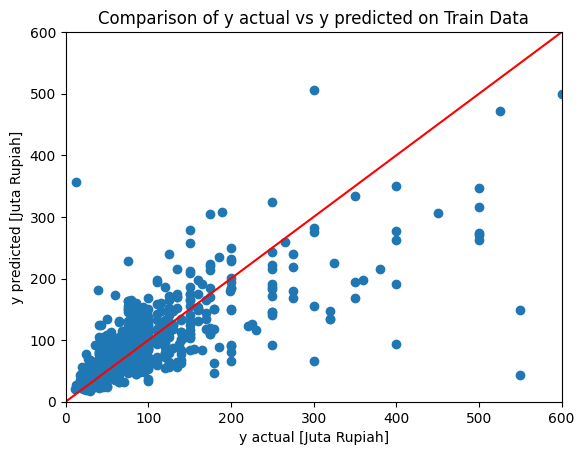

In [ ]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_train_dropped/1e6, y_train_pred/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Train Data')
plt.show()

In [ ]:
# Predict (JUST RUN THE CODE)
y_valid_pred = reg_best.predict(X_valid_clean)

In [ ]:
# Find error (JUST RUN THE CODE)
valid_error = rmse(y_valid, y_valid_pred)
print(f'RMSE on Valid data: {valid_error/10**6:.2f} Juta')

RMSE on Valid data: 34.48 Juta


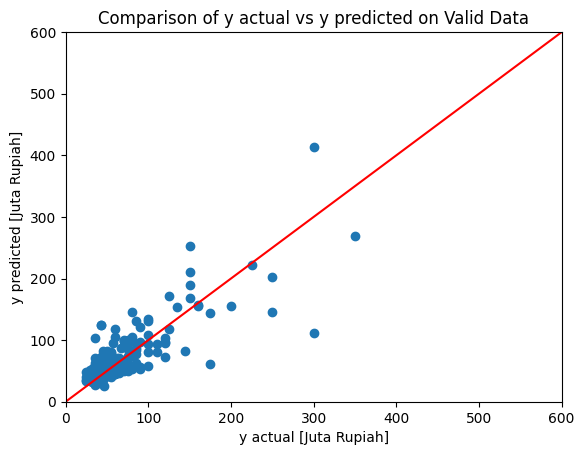

In [ ]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_valid/1e6, y_valid_pred/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Valid Data')
plt.show()

#### 4.2. Predict & evaluate on test data
---

In [ ]:
# Predict (JUST RUN THE CODE)
y_test_pred = reg_best.predict(X_test_clean)

In [ ]:
# Final generalization
test_error = rmse(y_test, y_test_pred)
print(f'RMSE on Test data: {test_error/10**6:.2f} Juta')

RMSE on Test data: 44.69 Juta


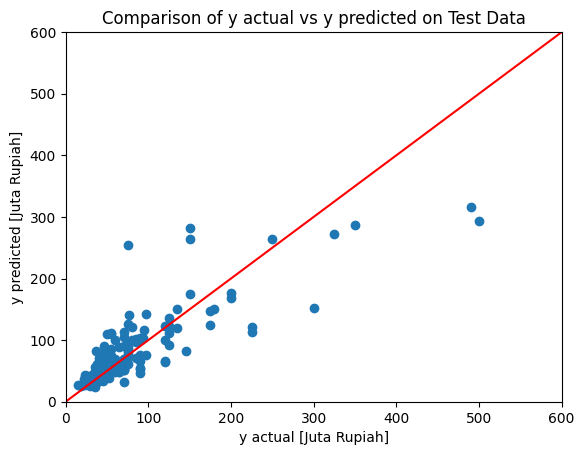

In [ ]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_test/1e6, y_test_pred/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Test Data')
plt.show()

### 5. Explore and generate a better model! (30)
---

- Please explore by yourself!
- Your **task** is to create a better model from the previous results.

In [ ]:
#########################################
# Write your code here
# Feel free to explore
#########################################

In [ ]:
# Use Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
rf = RandomForestRegressor()

# Perform GridSearchCV for Random Forest
reg_rf = GridSearchCV(rf, param_grid_rf, cv=10, scoring=rmse_scorer, return_train_score=True)
reg_rf.fit(X_train_clean, y_train_clean)

# Extract results for Random Forest
train_rf, valid_rf, best_param_rf = extract_cv_results(reg_rf)
print(f'Train score - Random Forest model: {train_rf/(10**6):.2f} Juta')
print(f'Valid score - Random Forest model: {valid_rf/(10**6):.2f} Juta')
print(f'Best Params - Random Forest model: {best_param_rf}')

Train score - Random Forest model: 33.47 Juta
Valid score - Random Forest model: 48.54 Juta
Best Params - Random Forest model: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
# Use Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb = GradientBoostingRegressor()

# Perform GridSearchCV for Gradient Boosting
reg_gb = GridSearchCV(gb, param_grid_gb, cv=10, scoring=rmse_scorer, return_train_score=True)
reg_gb.fit(X_train_clean, y_train_clean)

# Extract results for Gradient Boosting
train_gb, valid_gb, best_param_gb = extract_cv_results(reg_gb)
print(f'Train score - Gradient Boosting model: {train_gb/(10**6):.2f} Juta')
print(f'Valid score - Gradient Boosting model: {valid_gb/(10**6):.2f} Juta')
print(f'Best Params - Gradient Boosting model: {best_param_gb}')

Train score - Gradient Boosting model: 25.25 Juta
Valid score - Gradient Boosting model: 50.89 Juta
Best Params - Gradient Boosting model: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Train score - Gradient Boosting model: 31.14 Juta
Valid score - Gradient Boosting model: 50.90 Juta
Best Params - Gradient Boosting model: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
# Use SVR
from sklearn.svm import SVR

# Define the parameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2]
}

# Perform GridSearchCV for SVR
reg_svr = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid_svr,
    scoring='neg_root_mean_squared_error',  # Menggunakan RMSE
    cv=10,
    return_train_score=True
)
reg_svr.fit(X_train_clean, y_train_clean)

# Extract results for SVR
train_svr, valid_svr, best_param_svr = extract_cv_results(reg_svr)
print(f'Train score - SVR: {train_svr/(10**6):.2f} Juta')
print(f'Valid score - SVR: {valid_svr/(10**6):.2f} Juta')
print(f'Best Params - SVR: {best_param_svr}')

Train score - SVR: 79.64 Juta
Valid score - SVR: 78.19 Juta
Best Params - SVR: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}


In [ ]:
# Summarize Explored Models!
summary_df = pd.DataFrame(
    data={
        'model': ['Random Forest Regressor', 'Gradient Boosting','SVR'],
        'train_score': [train_rf, train_gb, train_svr],
        'valid_score': [valid_rf, valid_gb, valid_svr],
        'best_params': [best_param_rf, best_param_gb, best_param_svr]
    }
)

# Convert train and valid scores to millions
summary_df['train_score'] /= 10**6
summary_df['valid_score'] /= 10**6

# Display the summary
summary_df

,model,train_score,valid_score,best_params
0,Random Forest Regressor,33.468193,48.544338,"{'max_depth': 15, 'min_samples_split': 10, 'n_..."
1,Gradient Boosting,31.140026,50.904686,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
2,SVR,79.635259,78.194581,"{'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}"




```
To determine the best model, we should focus on the valid score because it describes the performance of the model on data that has not been seen before, and we look for the lowest valid score (lower RMSE indicates better performance).
•	Random Forest Regressor has a valid score of 48.54
•	Gradient Boosting has a valid score of 50.90
•	SVR has a valid score of 78.19

Conclusion: The Random Forest Regressor model with a valid score of 48.54 is the best, because it has the lowest valid score (smallest RMSE) compared to other models.
```



In [ ]:
#####################################################################
# Recreate or retrain your best regression model
# Set is as reg_best
#####################################################################

# Best parameters for Random Forest
best_params_rf = {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}

# Initialize the RandomForestRegressor model with the best parameters
reg_best = RandomForestRegressor(
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators']
)

# Fit the model to the training data
reg_best.fit(X_train_clean, y_train_clean)

RandomForestRegressor(max_depth=15, n_estimators=200)

#### Predict & evaluate on train & valid data
---

In [ ]:
# Predict (JUST RUN THE CODE)
y_train_pred = reg_best.predict(X_train_clean)

In [ ]:
# Find error (JUST RUN THE CODE)
train_error = rmse(y_train_dropped, y_train_pred)
print(f'RMSE on Train data: {train_error/10**6:.2f} Juta')

RMSE on Train data: 20.09 Juta


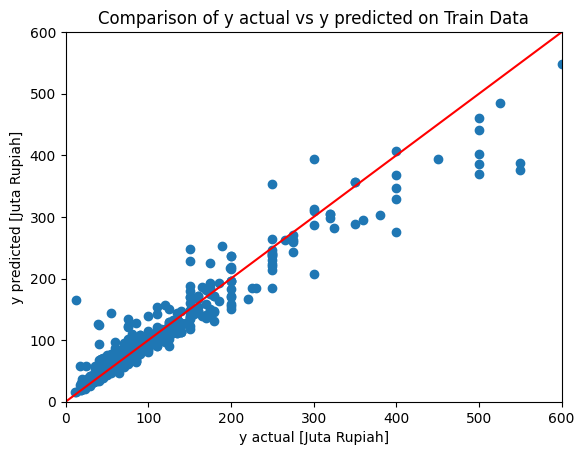

In [ ]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_train_dropped/1e6, y_train_pred/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Train Data')
plt.show()

In [ ]:
# Predict (JUST RUN THE CODE)
y_valid_pred = reg_best.predict(X_valid_clean)

In [ ]:
# Find error (JUST RUN THE CODE)
valid_error = rmse(y_valid, y_valid_pred)
print(f'RMSE on Valid data: {valid_error/10**6:.2f} Juta')

RMSE on Valid data: 39.68 Juta


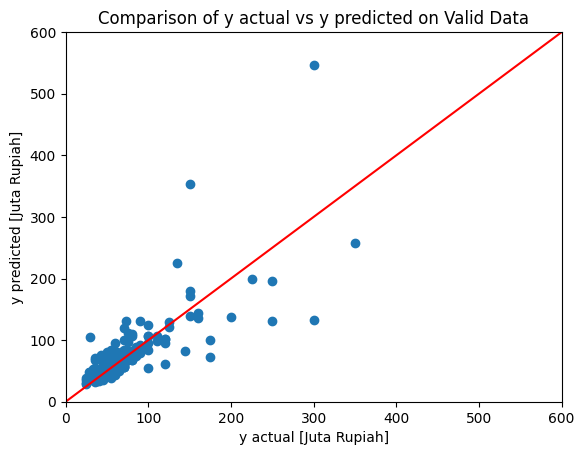

In [ ]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_valid/1e6, y_valid_pred/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Valid Data')
plt.show()

#### Predict & evaluate on test data
---

In [ ]:
# Predict (JUST RUN THE CODE)
y_test_pred = reg_best.predict(X_test_clean)

In [ ]:
# Final generalization
test_error = rmse(y_test, y_test_pred)
print(f'RMSE on Test data: {test_error/10**6:.2f} Juta')

RMSE on Test data: 52.95 Juta


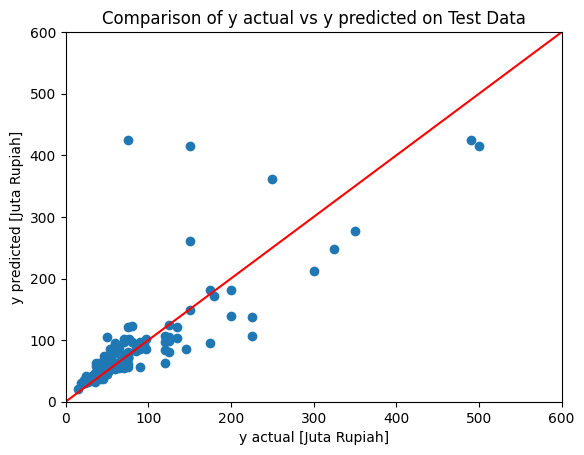

In [ ]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_test/1e6, y_test_pred/1e6)

plt.plot([0, 600], [0, 600], c='red')
plt.xlim(0, 600); plt.ylim(0, 600)
plt.xlabel('y actual [Juta Rupiah]'); plt.ylabel('y predicted [Juta Rupiah]')
plt.title('Comparison of y actual vs y predicted on Test Data')
plt.show()